In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import

In [2]:
df = pd.read_csv("Data/clean_data.csv", index_col=  "Index")

# Get dummies

In [3]:
df_dum = pd.get_dummies(df,drop_first=True)

# Split Data

In [4]:
X = df_dum.drop(["Price"], axis = 1)

In [5]:
y = df_dum["Price"]

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [457]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [458]:
scaler = StandardScaler()

In [459]:
X_train = scaler.fit_transform(X_train)

In [461]:
X_test = scaler.transform(X_test)

# DeepLearning

In [11]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error

In [15]:
X.head(1)

,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,Vehicle_brand_BMW,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
Index,,,,,,,,,,,,,,,,,,,,,
116465,2015,125000.0,136.0,1598.0,5.0,48.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
model = Sequential()

model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(25,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [22]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=10)

Epoch 1/10
972/972 [==============================] - 3s 3ms/step - loss: 13100.0127 - val_loss: 7305.5151
Epoch 2/10
972/972 [==============================] - 2s 3ms/step - loss: 6880.8687 - val_loss: 6983.4912
Epoch 3/10
972/972 [==============================] - 2s 3ms/step - loss: 6481.9888 - val_loss: 6505.5225
Epoch 4/10
972/972 [==============================] - 3s 3ms/step - loss: 6322.5977 - val_loss: 6356.2588
Epoch 5/10
972/972 [==============================] - 3s 3ms/step - loss: 6195.0044 - val_loss: 6467.1519
Epoch 6/10
972/972 [==============================] - 3s 3ms/step - loss: 6135.9731 - val_loss: 6206.2485
Epoch 7/10
972/972 [==============================] - 3s 3ms/step - loss: 6082.2021 - val_loss: 6222.2603
Epoch 8/10
972/972 [==============================] - 3s 3ms/step - loss: 6039.6265 - val_loss: 6222.8398
Epoch 9/10
972/972 [==============================] - 3s 3ms/step - loss: 5993.0425 - val_loss: 6135.0176
Epoch 10/10
972/972 [========================

In [141]:
losses = pd.DataFrame(model.history.history)

AttributeError: 'NoneType' object has no attribute 'history'

<AxesSubplot:>

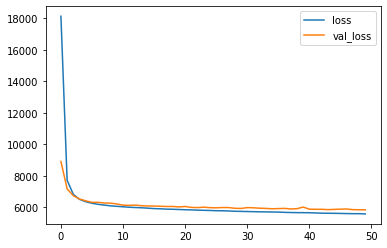

In [19]:
losses.plot()

In [23]:
preds = model.predict(X_test)

1667/1667 [==============================] - 2s 1ms/step


In [27]:
mean_absolute_error(y_test,preds) 

6121.006071848773

In [56]:
preds_df = pd.DataFrame(preds)

In [69]:
y_df = pd.DataFrame(y_test.values)

In [70]:
preds_df

,0
0,28820.498047
1,56115.421875
2,13439.291992
3,50261.140625
4,135036.015625
...,...
53315,25886.279297
53316,31789.775391
53317,23724.123047
53318,103067.273438


In [72]:
y_df

,0
0,29900
1,65500
2,14800
3,48000
4,121494
...,...
53315,26900
53316,27900
53317,20600
53318,89990


In [74]:
pd.concat([preds_df,y_df],axis = 1, ignore_index=True,join = "outer")

,0,1
0,28820.498047,29900
1,56115.421875,65500
2,13439.291992,14800
3,50261.140625,48000
4,135036.015625,121494
...,...,...
53315,25886.279297,26900
53316,31789.775391,27900
53317,23724.123047,20600
53318,103067.273438,89990


# Cars 100k max

In [75]:
df = pd.read_csv("Data/clean_data.csv", index_col=  "Index")

In [92]:
df = df[df["Price"] < 100000]

In [93]:
df_dum = pd.get_dummies(df,drop_first=True)

In [94]:
X = df_dum.drop(["Price"], axis = 1)

In [95]:
y = df_dum["Price"]

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [99]:
X_train = scaler.fit_transform(X_train)

In [100]:
X_test = scaler.transform(X_test)

In [157]:
model = Sequential()
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))

#model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [158]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=256,epochs=25)

Epoch 1/25
431/431 [==============================] - 9s 14ms/step - loss: 9211.1494 - val_loss: 5416.8145
Epoch 2/25
431/431 [==============================] - 5s 12ms/step - loss: 5074.0024 - val_loss: 4934.4648
Epoch 3/25
431/431 [==============================] - 4s 10ms/step - loss: 4852.3267 - val_loss: 4783.9839
Epoch 4/25
431/431 [==============================] - 4s 9ms/step - loss: 4697.6836 - val_loss: 4912.2056
Epoch 5/25
431/431 [==============================] - 4s 9ms/step - loss: 4581.1523 - val_loss: 4869.3076
Epoch 6/25
431/431 [==============================] - 4s 9ms/step - loss: 4505.7959 - val_loss: 4647.0776
Epoch 7/25
431/431 [==============================] - 4s 9ms/step - loss: 4486.6001 - val_loss: 5078.2334
Epoch 8/25
431/431 [==============================] - 4s 9ms/step - loss: 4443.0034 - val_loss: 4519.1440
Epoch 9/25
431/431 [==============================] - 4s 9ms/step - loss: 4374.0503 - val_loss: 4507.2100
Epoch 10/25
431/431 [======================

In [159]:
#4578.7266
#4543.4751
#4360.3477
#4478.7959
#4366.9976
#4250.8774
#4263.8779


In [160]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

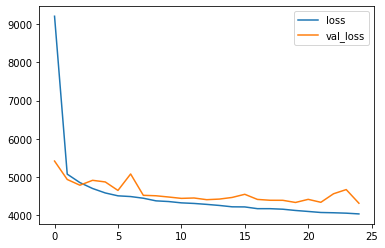

In [161]:
losses.plot()

In [162]:
preds = model.predict(X_test)

1476/1476 [==============================] - 5s 2ms/step


In [167]:
y_df = pd.DataFrame(y_test.values)
y_df

,0
0,7700
1,15900
2,22900
3,23500
4,74400
...,...
47198,50000
47199,32500
47200,28900
47201,10900


In [173]:
preds.round()

array([[ 8149.],
       [ 9485.],
       [23148.],
       ...,
       [28413.],
       [10882.],
       [55898.]], dtype=float32)

In [174]:
preds_df = pd.DataFrame(preds.round())
preds_df

,0
0,8149.0
1,9485.0
2,23148.0
3,21524.0
4,82426.0
...,...
47198,56326.0
47199,28682.0
47200,28413.0
47201,10882.0


In [180]:
df.drop("Price",axis = 1)

,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,
116465,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,Used,Chevrolet,Spark,2010,200000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,silver,21.0
36981,Used,Chevrolet,Spark,2012,112644.0,68.0,1000.0,Gasoline,Front wheels,Manual,5.0,black,19.0
36984,Used,Chevrolet,Spark,2011,126000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,black,7.0


In [181]:
df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
Index,,,,,,,,,,,,,,
116465,42900,Used,Opel,Astra,2015,125000.0,136.0,1598.0,Diesel,Front wheels,Manual,5.0,red,48.0
116466,11900,Used,Opel,Astra,2006,192547.0,140.0,1796.0,Gasoline,Front wheels,Manual,5.0,green,35.0
116467,25900,Used,Opel,Astra,2010,119000.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,32.0
116468,8400,Used,Opel,Astra,2007,290000.0,100.0,1910.0,Diesel,Front wheels,Manual,5.0,silver,25.0
116469,15999,Used,Opel,Astra,2008,168779.0,115.0,1598.0,Gasoline,Front wheels,Manual,5.0,silver,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36977,9800,Used,Chevrolet,Spark,2010,200000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,silver,21.0
36981,13800,Used,Chevrolet,Spark,2012,112644.0,68.0,1000.0,Gasoline,Front wheels,Manual,5.0,black,19.0
36984,11500,Used,Chevrolet,Spark,2011,126000.0,68.0,995.0,Gasoline,Front wheels,Manual,5.0,black,7.0


In [182]:
result_df = pd.concat([y_df,preds_df],axis = 1)

In [184]:
result_df.columns = ["Real Price", "Predicted Price"]

In [186]:
result_df["Difference"] = result_df["Real Price"] - result_df["Predicted Price"]

In [204]:
result_df["% of error"] = abs((result_df["Difference"]/result_df["Real Price"]) * 100).round(2)

In [205]:
result_df.head(10)

,Real Price,Predicted Price,Difference,% of error
0,7700,8149.0,-449.0,5.83
1,15900,9485.0,6415.0,40.35
2,22900,23148.0,-248.0,1.08
3,23500,21524.0,1976.0,8.41
4,74400,82426.0,-8026.0,10.79
5,33000,27576.0,5424.0,16.44
6,24900,28789.0,-3889.0,15.62
7,6900,7773.0,-873.0,12.65
8,17200,24171.0,-6971.0,40.53
9,7900,8648.0,-748.0,9.47


In [212]:
result_df[result_df["% of error"] > 40]

,Real Price,Predicted Price,Difference,% of error
1,15900,9485.0,6415.0,40.35
8,17200,24171.0,-6971.0,40.53
11,13700,20017.0,-6317.0,46.11
26,29900,85593.0,-55693.0,186.26
53,26900,63181.0,-36281.0,134.87
...,...,...,...,...
47157,54900,86109.0,-31209.0,56.85
47164,18500,31171.0,-12671.0,68.49
47181,10000,15992.0,-5992.0,59.92
47191,32000,46819.0,-14819.0,46.31


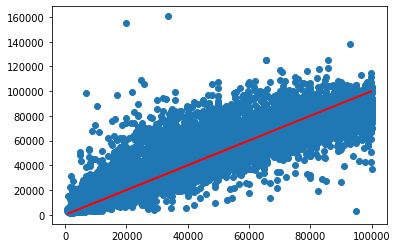

In [206]:
plt.scatter(y_test,preds)

# Real Value
plt.plot(y_test,y_test,'r')

In [208]:
from sklearn.metrics import r2_score

In [209]:
r2_score(y_test,preds)

0.9164349810245234

In [219]:
df.iloc[1].values

array([11900, 'Used', 'Opel', 'Astra', 2006, 192547.0, 140.0, 1796.0,
       'Gasoline', 'Front wheels', 'Manual', 5.0, 'green', 35.0],
      dtype=object)

In [469]:
df.columns

Index(['Price', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Doors_number', 'Colour',
       'Features'],
      dtype='object')

In [470]:
df.iloc[200].values

array([6900, 'Used', 'Opel', 'Astra', 2006, 214652.0, 105.0, 1598.0,
       'Gasoline', 'Front wheels', 'Manual', 5.0, 'black', 13.0],
      dtype=object)

In [495]:
car1 = [[11900,'Used', 'Opel', 'Astra', 2010, 214652.0, 105.0, 1598.0,'Gasoline', 'Front wheels', 'Manual', 5.0, 'black', 13.0],
       [ 0,'x', 'x', 'x', 1, 1, 1, 1.0,'x', 'x', 'x', 1.0, 'green', 1.0]]

In [496]:
car1_df = pd.DataFrame(car1)

In [497]:
car1_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,11900,Used,Opel,Astra,2010,214652.0,105.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,13.0
1,0,x,x,x,1,1.0,1.0,1.0,x,x,x,1.0,green,1.0


In [498]:
car1_df.drop(1,inplace=True)

In [499]:
car1_df.columns = df.columns

In [500]:
car1_df

,Price,Condition,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Doors_number,Colour,Features
0,11900,Used,Opel,Astra,2010,214652.0,105.0,1598.0,Gasoline,Front wheels,Manual,5.0,black,13.0


In [501]:
car1_dummies = pd.get_dummies(car1_df)

In [502]:
car1_dummies

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Opel,Vehicle_model_Astra,Fuel_type_Gasoline,Drive_Front wheels,Transmission_Manual,Colour_black
0,11900,2010,214652.0,105.0,1598.0,5.0,13.0,1,1,1,1,1,1,1


In [503]:
car1_full_dummies = pd.concat([df_dum.iloc[[0,1]],car1_dummies]).fillna(0)

In [504]:
car1_full_dummies.iloc[[-1]]

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number,Features,Condition_Used,Vehicle_brand_Alfa Romeo,Vehicle_brand_Audi,...,Colour_burgundy,Colour_golden,Colour_gray,Colour_green,Colour_other,Colour_red,Colour_silver,Colour_violet,Colour_white,Colour_yellow
0,11900,2010,214652.0,105.0,1598.0,5.0,13.0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [505]:
car1_full_dummies.iloc[[-1]]["Price"]

0    11900
Name: Price, dtype: int64

In [506]:
car1_full_dummies.drop("Price", axis = 1 , inplace=True)

In [507]:
car_to_predict = car1_full_dummies.iloc[[-1]].values

In [508]:
car_to_predict_s = scaler.transform(car_to_predict)

c:\users\kacpe\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [509]:
model.predict(car_to_predict_s)

1/1 [==============================] - 1s 906ms/step


array([[16527.125]], dtype=float32)